# Part 5 - Création du programme

## Import des librairies

## Création du programme

J'utilise mes classes MyPCA et LogReg pour réaliser le programme.

MyPCA est disponible ici : https://github.com/nicodesh/DescStats

LogReg est disponible ici : https://github.com/nicodesh/ModelStats

## Fichier à tester

In [17]:
csv = 'data/test-billet.csv'

## Ecriture du programme

In [18]:
import pandas as pd
import numpy as np
import pickle

from sklearn import preprocessing

from modelstats import LogReg
from descstats import MyPCA
from modelstats import LogReg

def detecteur_billet(csv):
    """ Détecte si un billet est vrai ou non. Retourne un dataframe
    Args:
        csv (CSV file): Fichier CSV avec un billet par ligne.
    """
    
    # Lecture du fichier CSV
    df = pd.read_csv(csv)
    data = df.iloc[:,:-1].copy()
    
    # Récupération du modèle
    with open('data/model_pca.pkl', 'rb') as f:
        my_unpickler = pickle.Unpickler(f)
        model = my_unpickler.load()
        
    # Récupération de l'ACP
    with open('data/pca.pkl', 'rb') as f:
        my_unpickler = pickle.Unpickler(f)
        the_pca = my_unpickler.load()
    
    # Préparation des données
    data = data[['length', 'margin_up', 'margin_low', 'height_left', 'height_right', 'diagonal']].copy()
    data_scaled = preprocessing.StandardScaler().fit_transform(data)
    components = the_pca.pca.transform(data_scaled)
    data['f1'] = components[:,0]
    data['f2'] = components[:,1]
    
    # Modélisation à partir de ma classe LogReg
    results = LogReg(data[['f1', 'f2']], threshold=0.5, model=model, predict=True)
    
    # Création de deux colonnes avec les résultats du modèle
    df['is_genuine'] = results.data['model']
    df['human_value'] = df['is_genuine'].apply(lambda x: 'Vrai billet' if x == 1 else 'Faux billet')
    
    # Renvoi uniquement l'identifiant du billet et le résultat lisible
    return df[['id', 'human_value']]

## Lancement du programme

In [19]:
df = detecteur_billet(csv)
df

,id,human_value
0,B_1,Vrai billet
1,B_2,Faux billet
2,B_3,Vrai billet
3,B_4,Faux billet
4,B_5,Faux billet


## Visualisation des billets à prédire sur le premier plan factoriel

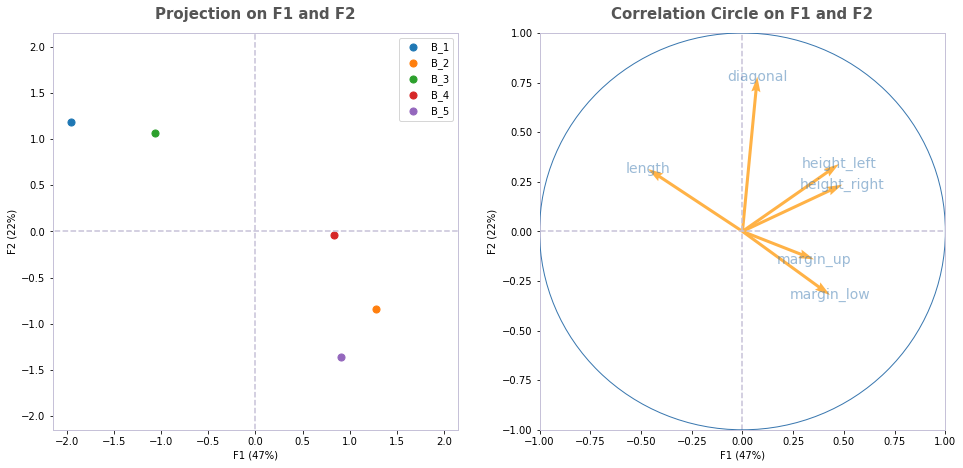

In [20]:
# Fichier à tester
df2 = pd.read_csv(csv)
df2_names = df2.iloc[:,-1]
df2 = df2.iloc[:,:-1]

# ACP du modèle
with open('data/pca.pkl', 'rb') as f:
    my_unpickler = pickle.Unpickler(f)
    the_pca = my_unpickler.load()

# Intégration des données dans le modèle
df2_proj = preprocessing.StandardScaler().fit_transform(df2)
the_pca.custom = df2_proj
the_pca.custom_names = df2_names
the_pca.custom_projected = the_pca.pca.transform(the_pca.custom)

# Affichage
the_pca.scattercircle(1, 2, labelcircle=True, data_projected='custom')